AUTHOR : HARINI A

Prediction using Supervised ML

Task - Predict the percentage of an student based on the no. of study hours

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [4]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

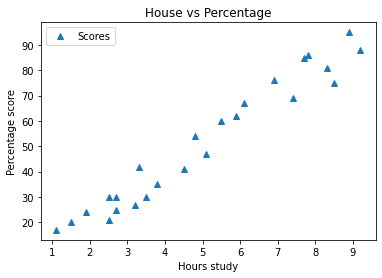

In [5]:
df.plot(x = "Hours",y = "Scores",style = "^")
plt.title("House vs Percentage")
plt.xlabel("Hours study")
plt.ylabel("Percentage score")
plt.show()

From the above graph ,we can clearly see that there is positive linear relation between the"Numbers of hours studied"and "Percentage of score"

In [6]:
#Preparing the data
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [7]:
x[0:6]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5]])

In [8]:
y[0:21]

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30])

Split the dataset into training and testing set and then train model with training set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#test size=0.2 means we are dividing train and test data in the ratio 80 :20
#random state is used to pickup the value randomly

Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
M = regressor.coef_  #slope
M

array([9.91065648])

In [12]:
C = regressor.intercept_  # intercept
C

2.018160041434662

Visualize the model

In [13]:
#After training the model we are visualizing linear regression on a graph.ie,checking how line will fit the data

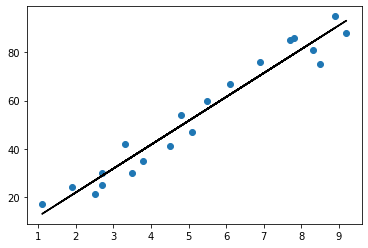

In [14]:
#Best fit line for training data
Y = M*x + C
#plotting for training data
plt.scatter(x_train,y_train)
plt.plot(x,Y, color = "Black")
plt.show()

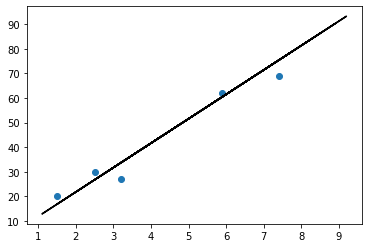

In [15]:
#Best fit line for testing data
Y= M* x + C
# plotting for testing data
plt.scatter(x_test,y_test)
plt.plot(x,Y,color = "Black")
plt.show()

In [16]:
print(x_test)  #testing data--Hours studied

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_predict = regressor.predict(x_test) #predicted score
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
print(y_test) #actual value

[20 27 69 30 62]


Compare actual value with predicted value

In [19]:
cd = pd.DataFrame({'Actual':y_test,"Predicted":y_predict})
cd

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
#test with our own data
sd = regressor.predict([[9.25]])
sd

array([93.69173249])

In [21]:
print("Number of Hours :",str(9.25))
print("Predicted Score :",sd)

Number of Hours : 9.25
Predicted Score : [93.69173249]


Evaluation Of Model

In [22]:
#final step to check the model performance . This is very usefull when we want to compare the performance of model on the same 
#data set .For sake of simplicity we would use MSE( Mean squared Error) as the metric .

In [23]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_predict))

Mean Absolute Error : 4.183859899002982


So I Finally Predicted The Score Is : 93.69173249